<class 'tuple'>
(36, 77, [11])
LLLLEEE 50
34 76 0.5
35 76 1.5
35 76 2.5
35 76 3.5
35 76 4.5
35 76 5.5
35 76 6.5
35 76 7.5
42 76 8.5
47 76 9.5
50 76 10.5
50 76 11.5
51 76 12.5
63 76 13.5
77 97 14.5
81 112 15.5
81 111 16.5
81 97 17.5
81 97 18.5
81 97 19.5
81 97 20.5
81 97 21.5
81 112 22.5
81 98 23.5
81 97 24.5
81 92 25.5
82 97 26.5
83 97 27.5
85 97 28.5
87 112 29.5
87 111 30.5
87 97 31.5
97 111 32.5
98 112 33.5
98 111 34.5
98 112 35.5
98 112 36.5
101 112 37.5
101 111 38.5
112 126 39.5
113 126 40.5
116 126 41.5
117 126 42.5
117 126 43.5
117 125 44.5
132 141 45.5
132 140 46.5
133 141 47.5
133 140 48.5
133 141 49.5
Rectangle(xy=(34, 0.25), width=43, height=0.5, angle=0)
Rectangle(xy=(35, 1.25), width=42, height=0.5, angle=0)
Rectangle(xy=(35, 2.25), width=42, height=0.5, angle=0)
Rectangle(xy=(35, 3.25), width=42, height=0.5, angle=0)
Rectangle(xy=(35, 4.25), width=42, height=0.5, angle=0)
Rectangle(xy=(35, 5.25), width=42, height=0.5, angle=0)
Rectangle(xy=(35, 6.25), width=42, height=0.5,

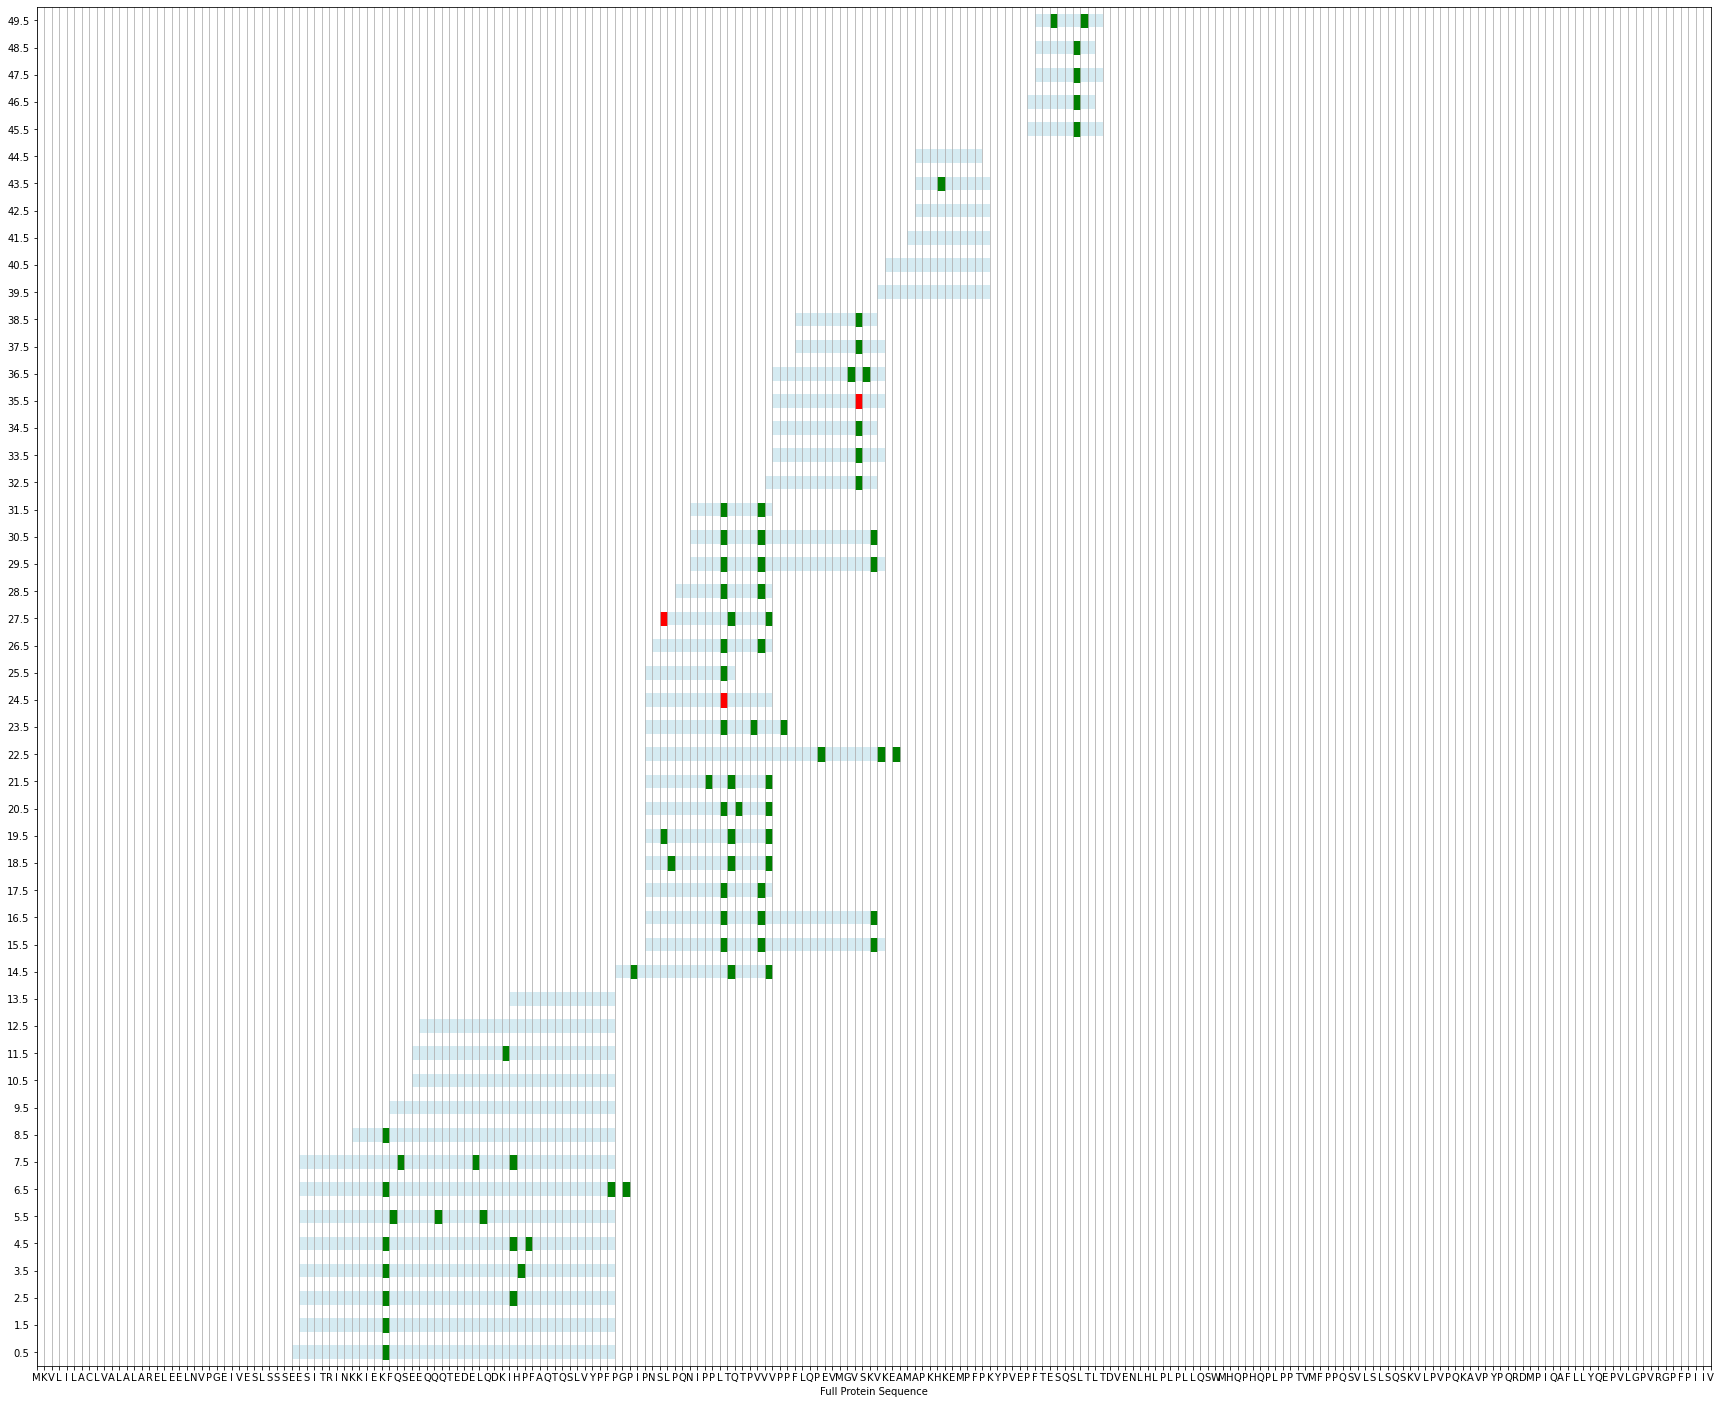

<AxesSubplot:xlabel='Full Protein Sequence'>

In [17]:
from utils import get_data_and_remove_unwanted_columns, sanitize_data, preprocess_data_for_peptide_segment_plot, get_protein_sequence, get_position_of_mass_shift_and_sign
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as patches

df = get_data_and_remove_unwanted_columns()
df = sanitize_data(df)
df = preprocess_data_for_peptide_segment_plot(df, _protein="P00711", size=50)

def get_peptide_segments_and_modifications(data, delta=0.5, _protein="P02666"):
    """data is a list of tuples on the form (low,hi, [modifications])"""
    yplaces = [.5+i for i in range(len(data))]
    data = sorted(data, key=lambda x: x[0])
    rectatngles = []
    modifications = []
    #save index and value
    highest_val = 0 
    position_idx = 0 #value to keep track of where we should place next rectangle
    for i in range (len(data)):
        low, hi, mods = data[i]
        low, hi = low-1, hi-1 #convert to zero based index
        if hi > highest_val:
            highest_val = hi
        if low > highest_val:
            position_idx = 0
        pos = yplaces[position_idx]
        position_idx += 1 
        print(low, hi, pos)
        rectatngles.append(patches.Rectangle((low,pos-delta/2.0),hi-low+1, delta, facecolor = '#add8e6', alpha=0.5))
        for _ms in mods: #add mass shift color on rectangles if present
            if _ms > 0:
                modifications.append(patches.Rectangle((low+_ms,pos-delta/2.0),1,delta, color="green"))
            else:
                _ms = (-1)*_ms
                modifications.append(patches.Rectangle((low+_ms,pos-delta/2.0),1,delta, color="red"))
    return rectatngles[::-1], modifications[::-1]

def plot_peptide_segments(segments_patches, modifications_patches, _protein="P02666"):
    fig = plt.figure(figsize=(30,25))
    ax = fig.add_subplot(111)
    yplaces = [.5+i for i in range(len(segments_patches))]
    ax.set_yticks(yplaces)
    ax.set_ylim((0,len(data)))

    for rect in segments_patches:
        print(rect)
        ax.add_patch(rect)
    for mod in modifications_patches:
        ax.add_patch(mod)
    ax.grid(axis='x')
    seqq = get_protein_sequence(_protein)
    ax.set_xlabel("Full Protein Sequence")
    ax.set_xticks(range(0,len(seqq)))
    # create list of chars from string 
    protein_seq_list = list(seqq)
    ax.set_xticklabels(protein_seq_list)
    plt.show()
    return ax
def preprocess_data_for_peptide_segment_plot_new(df, _protein="P02666", size=50):
    # get position of mass shift in "peptide" for each row
    df["Position of Mass Shift"] = df["Peptide"].apply(get_position_of_mass_shift_and_sign)
    # this is the main script, note that we have imported pyplot as plt
    start_end_df = df[["Start", "End", "Protein Accession", "Peptide", 'Position of Mass Shift']]
    #only look at values for protein : P02666
    start_end_df = start_end_df[start_end_df["Protein Accession"] == _protein]
    start_end_df.sort_values('Start', inplace=True)
    start_end_df['index1'] = start_end_df.index
    #concat index1 and protein accession
    start_end_df['Protein_Accession_idx'] = start_end_df['Protein Accession'] +"_" + start_end_df['index1'].astype(str) 
    start_end_df["(start,end,pos_ms)"] = start_end_df[["Start", "End", 'Position of Mass Shift']].apply(tuple, axis=1)
    start_end_df.drop(["Start", "End", "index1"], axis=1, inplace=True)
    start_end_df.sort_values('Protein_Accession_idx', inplace=True)
    new = start_end_df.head(size)
    # make dictionary with index as keys and (Start,End) as values
    #data = new.groupby("Protein_Accession_idx").apply(lambda x: x["(start,end,peptide,pos_ms)"].tolist())
    return new['(start,end,pos_ms)'].tolist()

df = get_data_and_remove_unwanted_columns()
df = sanitize_data(df)
data = preprocess_data_for_peptide_segment_plot_new(df, _protein="P00711", size=50)
print(type(data[0]))
print(data[0])
print("LLLLEEE",len(data))
rectatngles, modifications = get_peptide_segments_and_modifications(data, delta=0.5, _protein="P00711")
plot_peptide_segments(rectatngles, modifications, _protein="P02666")
